# CAPSTONE PROJECT 3: Optimisasi Biaya Kampanye Berdasarkan Prediksi Nilai  Customer Lifetime Value Dalam Industri Asuransi Kendaraan

Tigfhar Ahmadjayadi
JCDS-2304

Ver: 06 Juni 2024

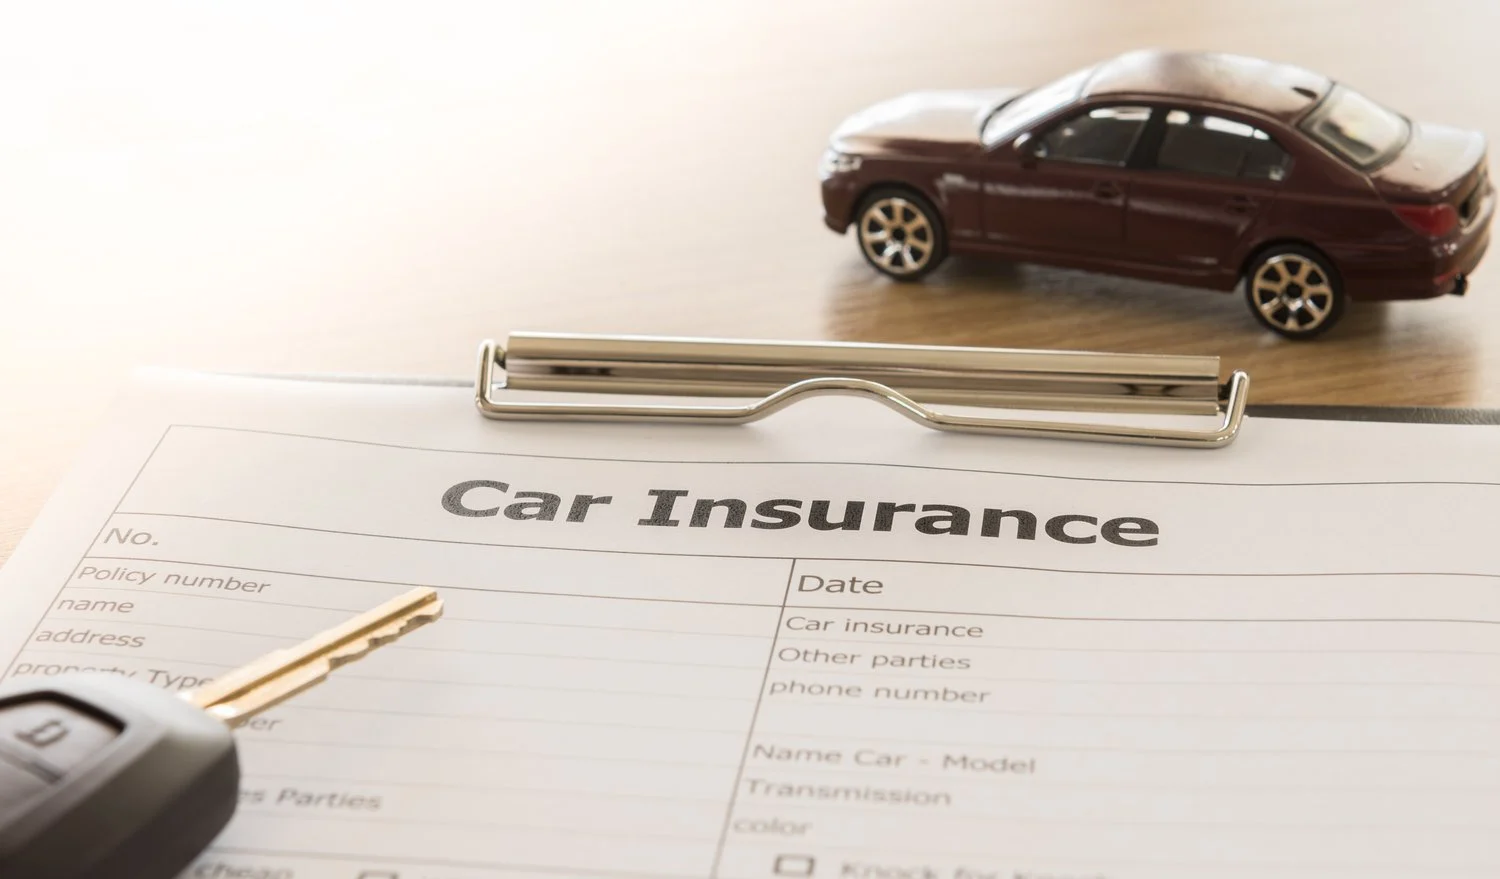

source: https://www.thezebra.com/resources/car-insurance/12-things-car-insurance-doesnt-cover/

# 1. INTRODUCTION

> ## 1.1. BACKGROUND

> Setelah beberapa tahun beroperasi, sebuah perusahaan asuransi kendaraan mengalami stagnasi dalam pendapatan tahunan. Untuk mengatasi masalah ini, perusahaan memutuskan untuk memanfaatkan data yang telah dikumpulkan guna merancang perencanaan keuangan yang optimal di masa depan. Dengan pendekatan analitis, perusahaan berupaya memahami lebih dalam tentang pelanggannya dan memprediksi nilai Customer Lifetime Value (CLV) mereka. Dengan strategi ini, perusahaan berharap dapat meningkatkan pendapatan dengan mengoptimalkan biaya kampanye  pada pelanggan yang tepat berdasarkan prediksi CLV.

> ## 1.2. STAKEHOLDER

> Analisis ini secara khusus ditujukan kepada `Tim Marketing perusahaan`, yang bertanggung jawab untuk merancang strategi kampanye untuk meningkatkan retensi pelanggan dan efisiensi biaya. Tim ini akan menggunakan hasil analisis untuk mengidentifikasi segmen pelanggan yang paling bernilai dan mengalokasikan biaya kampanye dengan lebih efektif. 

> ## 1.3. PROBLEM STATEMENT

> **Pertanyaan Bisnis Utama:** <br>
> Bagaimana cara perusahaan meningkatkan pendapatan dengan menghemat biaya kampanye menggunakan nilai prediksi CLV?
>
> **Pertanyaan Bisnis Turunan:** <br>
> 1. Bagaimana model machine learning yang tepat untuk dapat memprediksi nilai CLV pelanggan yang dapat digunakan untuk menghemat biaya kampanye?
> 2. Bagaimana segmentasi pelanggan yang tepat untuk dijadikan target kampanye berdasarkan nilai CLV dalam menghemat biaya kampanye?
            
> ## 1.4. GOALS

> Tujuan dilakukannya analisa ini yaitu untuk meningkatkan pendapatan perusahaan dengan menentukan strategi yang optimal dalam mengelola biaya kampanye lebih efisien, berdasarkan hasil prediksi nilai *Customer Lifetime Value*

> ## 1.6. CUSTOMER LIFETIME VALUE

> #### OVERVIEW
> Customer Lifetime Value adalah total pendapatan atau keuntungan yang dihasilkan oleh seorang pelanggan selama seluruh hubungan mereka dengan suatu bisnis. Dalam kasus ini, CLV adalah metrik untuk mengukur jumlah total uang yang telah dihabiskan (atau diharapkan akan dihabiskan) oleh seorang pelanggan asuransi kendaraan pada produk dan layanan, sepanjang masa sebagai pelanggan. Semakin tinggi CLV, semakin berharga seorang pembeli bagi bisnis Anda, karena mereka akan menghasilkan lebih banyak pendapatan dan lebih mungkin untuk tetap loyal.

> ## 1.5. ANALYTICAL APPROACH

> Pendekatan analitik yang akan digunakan melibatkan analisis data untuk mengidentifikasi pola-pola dalam data yang ada dengan memanfaatkan model regresi menggunakan machine learning untuk membantu perusahaan asuransi kendaraan dalam menentukan strategi perencanaan keuangan yang optimal.

> ### Evaluation Metrics
> Analisa ini akan mengevaluasi model menggunakan RMSE, MAE, dan MAPE. Semakin kecil nilai metrik-metrik ini, semakin akurat model dalam memprediksi nilai *Customer Lifetime Value* (CLV) berdasarkan fitur yang digunakan.
    
> #### MAE (Mean Absolute Error)
> MAE (Mean Absolute Error) mengukur rata-rata kesalahan absolut antara prediksi dan nilai aktual. Metrik ini tidak sensitif terhadap outlier dan cocok untuk memprediksi nilai CLV (Customer Lifetime Value) karena memberikan bobot yang sama pada setiap perbedaan. Selain itu, metrik ini cenderung lebih mudah diinterpretasikan karena cara kerjanya yang lebih sederhana dan mudah dipahami oleh klien yang tidak memiliki latar belakang statistik.

> Rumus MAE adalah sebagai berikut:
> $$MAE =  \frac{\sum\nolimits_{i=1}^{n} |Y_i - \widehat{Y_i}|}{n}$$
> $$Mean Absolute Error$$
> - ∑ adalah sigma (penjumlahan dari suatu urutan atau fungsi)<br>
> - ŷi adalah nilai prediksi data ke i<br>
> - yi adalah nilai aktual data ke i<br>
> - n adalah jumlah data<br>

# 2. DATA PRE-MODELING

> ## 2.1. DATA OVERVIEW

In [1]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.api as sm
import category_encoders as ce

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split

# Menampilkan semua kolom dan baris dalam dataset
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_colwidth', 200)

# Menonaktifkan semua peringatan
warnings.filterwarnings("ignore")

In [2]:
# Import dataset raw
df_raw = pd.read_csv('data_customer_lifetime_value.csv')
df_raw.sample(5)

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
2487,Four-Door Car,Basic,Offer3,Employed,Married,Doctor,1.0,63.0,174.086385,32893.0,2507.407815
499,Four-Door Car,Premium,Offer1,Employed,Divorced,College,9.0,101.0,484.800000,26118.0,7974.949597
3288,Four-Door Car,Extended,Offer1,Employed,Divorced,High School or Below,7.0,78.0,374.400000,52018.0,5971.313496
5601,Four-Door Car,Extended,Offer1,Employed,Single,College,3.0,79.0,347.595108,94880.0,6271.315156
879,Four-Door Car,Basic,Offer2,Employed,Married,Bachelor,3.0,65.0,236.643695,33171.0,5147.110230


**TEMUAN**

Dataset ini berisi informasi terkait pelanggan dari sebuah perusahaan asuransi, yang mencakup berbagai aspek demografi dan atribut polis asuransi. Terdiri dari 11 kolom dengan 5669 baris, dengan detail kolom sebagai berikut:

| Kolom                   | Definisi                                                                 |
|-------------------------|--------------------------------------------------------------------------|
| **Vehicle Class**       | Kategori atau kelas dari kendaraan yang diasuransikan                   |
| **Coverage**            | Jenis cakupan asuransi yang dimiliki oleh pelanggan                      |
| **Renew Offer Type**    | Jenis penawaran yang diberikan saat perpanjangan polis asuransi          |
| **Employment Status**   | Status pekerjaan pelanggan                                               |
| **Marital Status**      | Status pernikahan pelanggan                                              |
| **Education**           | Tingkat pendidikan pelanggan                                             |
| **Number of Policies**  | Jumlah polis asuransi yang dimiliki oleh pelanggan                       |
| **Monthly Premium Auto**| Premi bulanan yang dibayarkan oleh pelanggan untuk asuransi kendaraan    |
| **Total Claim Amount**  | Jumlah total klaim yang diajukan oleh pelanggan                          |
| **Income**              | Pendapatan tahunan pelanggan                                             |
| **Customer Lifetime Value** | Nilai Customer Lifetime Value pelanggan dalam ($)                   |





> ## 2.2. DATA UNDERSTANDING 

In [3]:
# Membuat salinan dataset yang akan dianalisis
df = df_raw.copy()

In [4]:
# Memisahkan data train dan data test
df_train, df_test = train_test_split(df, test_size=0.2, random_state=2020)
df_train.sample(5)

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
2810,Two-Door Car,Basic,Offer2,Employed,Married,College,2.0,70.0,39.336222,64502.0,8355.774443
1121,Sports Car,Basic,Offer1,Unemployed,Divorced,High School or Below,3.0,112.0,537.600000,0.0,8007.399376
4814,Four-Door Car,Basic,Offer2,Employed,Divorced,College,5.0,61.0,120.436587,37929.0,4682.249396
399,Four-Door Car,Basic,Offer1,Medical Leave,Single,Bachelor,1.0,69.0,331.200000,29735.0,2453.570794
954,Four-Door Car,Basic,Offer2,Unemployed,Single,Bachelor,2.0,73.0,350.400000,0.0,7562.824036


In [5]:
# Melihat nama-nama kolom beserta tipe data dan jumlah value Non-Null
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4535 entries, 2414 to 864
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle Class            4535 non-null   object 
 1   Coverage                 4535 non-null   object 
 2   Renew Offer Type         4535 non-null   object 
 3   EmploymentStatus         4535 non-null   object 
 4   Marital Status           4535 non-null   object 
 5   Education                4535 non-null   object 
 6   Number of Policies       4535 non-null   float64
 7   Monthly Premium Auto     4535 non-null   float64
 8   Total Claim Amount       4535 non-null   float64
 9   Income                   4535 non-null   float64
 10  Customer Lifetime Value  4535 non-null   float64
dtypes: float64(5), object(6)
memory usage: 425.2+ KB


In [6]:
# Melihat nilai statistik deskriptif masing-masing kolom
display(df_train.describe(),df_train.describe(exclude='number'))

,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
count,4535.000000,4535.000000,4535.000000,4535.000000,4535.000000
mean,2.976185,92.922602,429.971324,37609.970452,7988.040813
std,2.392618,34.584259,286.110594,30509.844850,6817.574505
min,1.000000,61.000000,0.423310,0.000000,1898.007675
25%,1.000000,68.000000,266.345177,0.000000,3956.173678
50%,2.000000,82.000000,379.200000,33881.000000,5809.261551
75%,4.000000,109.000000,547.200000,62459.500000,9007.014951
max,9.000000,297.000000,2759.794354,99934.000000,83325.381190


,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education
count,4535,4535,4535,4535,4535,4535
unique,6,3,4,5,3,5
top,Four-Door Car,Basic,Offer1,Employed,Married,Bachelor
freq,2294,2794,1836,2818,2652,1367


In [7]:
# Membuat list_item dan mengisi data
list_item = []
for column in df_train.columns:
    list_item.append([column, df_train[column].nunique(), df_train[column].unique()])

# Membuat DataFrame table_unique
table_unique = pd.DataFrame(data=list_item, columns=['Nama Kolom', 'Jumlah Unique Value', 'Unique Value'])

# Menampilkan table_unique
table_unique

,Nama Kolom,Jumlah Unique Value,Unique Value
0,Vehicle Class,6,"[Four-Door Car, Two-Door Car, SUV, Sports Car, Luxury SUV, Luxury Car]"
1,Coverage,3,"[Basic, Extended, Premium]"
2,Renew Offer Type,4,"[Offer1, Offer3, Offer2, Offer4]"
3,EmploymentStatus,5,"[Employed, Unemployed, Medical Leave, Retired, Disabled]"
4,Marital Status,3,"[Married, Single, Divorced]"
5,Education,5,"[High School or Below, Bachelor, College, Doctor, Master]"
6,Number of Policies,9,"[2.0, 4.0, 3.0, 1.0, 9.0, 7.0, 6.0, 8.0, 5.0]"
7,Monthly Premium Auto,182,"[67.0, 91.0, 61.0, 79.0, 66.0, 65.0, 116.0, 63.0, 89.0, 107.0, 118.0, 83.0, 64.0, 86.0, 96.0, 110.0, 72.0, 74.0, 70.0, 76.0, 73.0, 99.0, 111.0, 115.0, 101.0, 113.0, 105.0, 137.0, 69.0, 100.0, 88.0..."
8,Total Claim Amount,2678,"[83.830109, 103.424766, 386.031248, 379.2, 316.8, 312.0, 556.8, 302.4, 392.604371, 289.040734, 566.4, 199.851201, 492.644465, 114.02307, 1120.677126, 398.4, 84.520776, 1138.687583, 471.443077, 269..."
9,Income,2934,"[34482.0, 30886.0, 44788.0, 24477.0, 0.0, 35795.0, 76157.0, 22571.0, 61222.0, 79090.0, 25261.0, 80028.0, 27681.0, 33175.0, 74015.0, 86933.0, 80590.0, 70061.0, 47747.0, 29491.0, 28666.0, 32906.0, 9..."


**TEMUAN**

Berdasarkan hasil analisa pada tahap "Data Understanding" diketahui bahwa:

- Dataset terdiri dari 10 kolom dengan tipe data kategorik (object) dan numerik (float). Dataset tidak memiliki *missing value*. 
- Statistik deskriptif pada setiap kolom numerik mengindikasikan distribusi data tidak normal dilihat selisih nilai mean dan Q2(median) yang tinggi.
- Kolom memiliki jumlah unique value yang berbeda-beda, di mana jumlah unique value yang banyak berada pada feature income, total calim Amount

> ## 2.4. EXPLORATORY DATA ANALYSIS

**NORMAL TEST**

In [8]:
# Membuat variabel berisi kolom numerik yang akan dilakukan uji normalitas
column_numeric = ['Number of Policies', 'Monthly Premium Auto', 'Total Claim Amount', 'Income', 'Customer Lifetime Value']

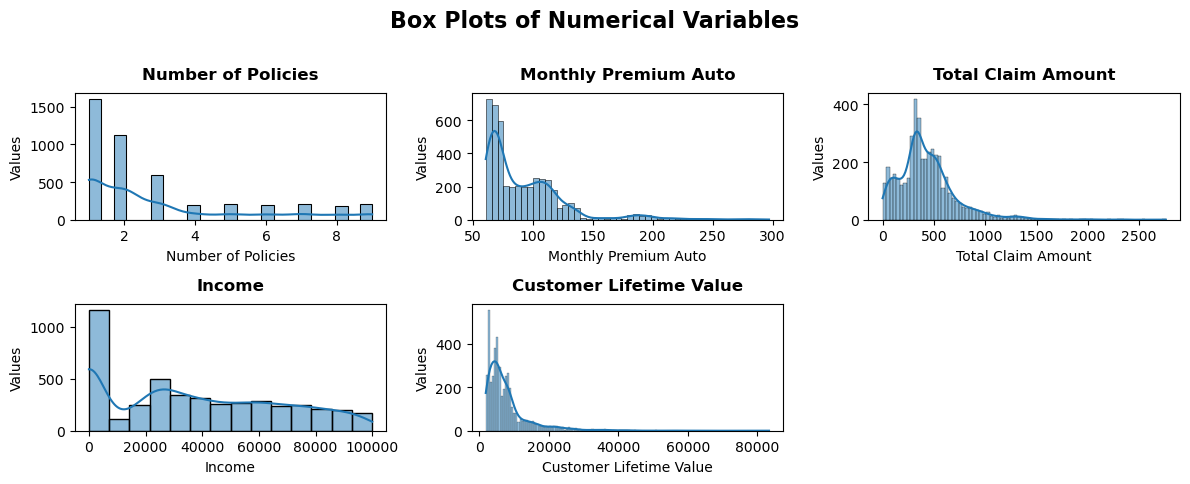

In [9]:
# Membuat plot boxplot horizontal
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 5))

axes = axes.flatten()

for i, col in enumerate(column_numeric):
    sns.histplot(data=df_train, x=col, ax=axes[i], kde=True)
    axes[i].set_title(f'{col}', pad=10, fontweight='bold', fontsize=12)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Values')
    
# Hapus subplot kosong jika kolom numerik kurang dari subplot yang disediakan
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Box Plots of Numerical Variables', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0.02, 1, 0.97])
plt.show()

In [10]:
from scipy.stats import shapiro

for column in  column_numeric:
    stat,p = shapiro(df_train[column].dropna())
    alpha = 0.05
    if p > alpha:
        print(f"Kolom '{column}' terdistribusi normal (p-value: {p:.4f})")
    else:
        print(f"Kolom '{column}' tidak terdistribusi normal (p-value: {p:.4f})")

Kolom 'Number of Policies' tidak terdistribusi normal (p-value: 0.0000)
Kolom 'Monthly Premium Auto' tidak terdistribusi normal (p-value: 0.0000)
Kolom 'Total Claim Amount' tidak terdistribusi normal (p-value: 0.0000)
Kolom 'Income' tidak terdistribusi normal (p-value: 0.0000)
Kolom 'Customer Lifetime Value' tidak terdistribusi normal (p-value: 0.0000)


**TEMUAN**

Berdasarkan hasil uji normlitas, ditemukan:
- Seluruh kolom numerik pada dataset terdistribusi tidak normal.

**BIVARIATE ANALYSIS**

In [11]:
# Membuat variabel berisi kolom kategorik yang akan dilakukan analisa bivariat
column_categoric = ['Vehicle Class','Coverage','Renew Offer Type','EmploymentStatus','Marital Status','Education']

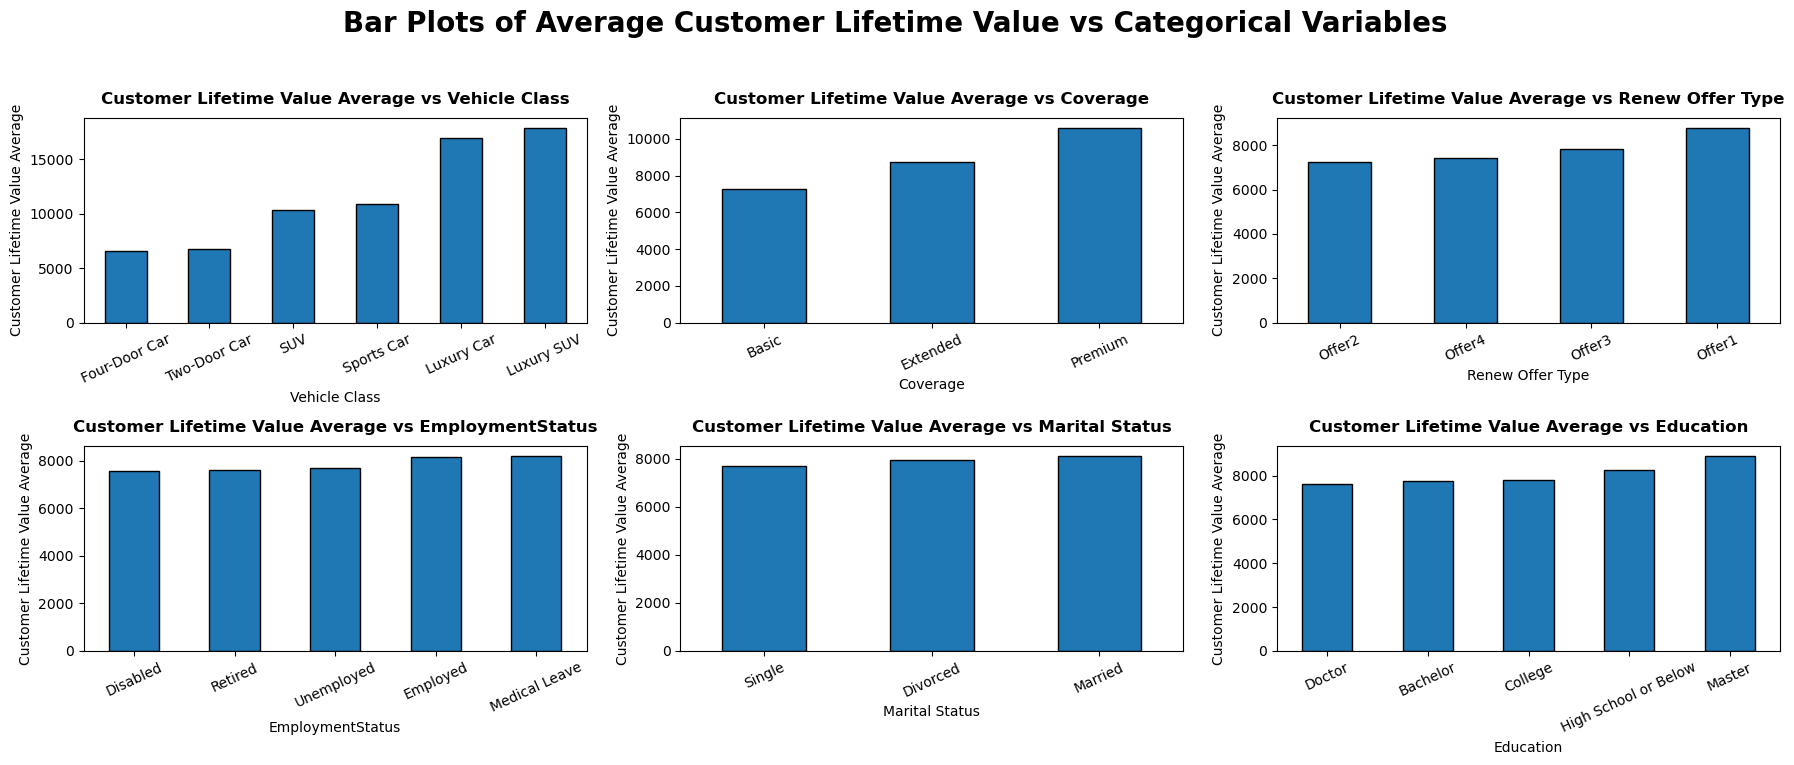

In [12]:
import matplotlib.pyplot as plt

# Menentukan jumlah subplot berdasarkan jumlah kolom kategorikal
n_cols = len(column_categoric)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 8))  # Grid 3x2 subplot

# Melakukan iterasi melalui setiap kolom kategorikal dan axis
for idx, col in enumerate(column_categoric):
    ax = axes[idx // 3, idx % 3]  # Menghitung posisi subplot berdasarkan index
    # Menghitung rata-rata Customer Lifetime Value untuk setiap kategori
    mean_clv = df_train.groupby(col)['Customer Lifetime Value'].mean().sort_values(ascending=True)

    # Membuat barplot pada subplot yang sesuai, dengan warna biru langit
    mean_clv.plot(kind='bar', ax=ax, edgecolor='black')
    ax.set_title(f'Customer Lifetime Value Average vs {col}', pad=10, fontweight='bold', fontsize=12)
    ax.set_ylabel('Customer Lifetime Value Average')
    ax.set_xlabel(col)
    ax.tick_params(axis='x', rotation=25)  # Rotasi label x-axis

# Menghapus axes yang tidak digunakan jika ada
if n_cols % 3:
    for i in range(n_cols, 6):
        fig.delaxes(axes[i // 3, i % 3])

plt.suptitle('Bar Plots of Average Customer Lifetime Value vs Categorical Variables', fontsize=20, fontweight='bold')

# Menyesuaikan layout dan menampilkan plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust rect to make room for suptitle
plt.show()


**TEMUAN**

Berdasarkan hasil analisa bivariat fitur kategorik dari demografi (Employment Status, Marital Status, Education) dan atribut polis asuransi (Vehicle Class, Coverage, Renew Offer Type) customer terhadap rata-rata nilai Customer Lifetime Value menunjukan bahwa:

1. `Vehicle Class` <br>
Terdapat korelasi antara nilai Customer Lifetime Value dengan kelas kendaraan pelanggan, dimana rata-rata Customer Lifetime Value cenderung meningkat, dari urutan kelas kendaraan pelanggan yang paling rendah ke tinggi yaitu, dengan urutan sebagai berikut; Four-Door Car, Two-Door Car, SUV, Sports Car, Luxury Car, dan Luxury SUV. <br><br>

2. `Coverage` <br>
Terdapat korelasi antara nilai Customer Lifetime Value dengan jenis cakupan klaim, dimana rata-rata Customer Lifetime Value cenderung meningkat, dari urutan jenis cakupan klaim yang paling rendah ke tinggi, dengan urutan sebagai berikut; Basic, Extended, dan Premium. <br><br>

3. `Renew Offer Type` <br>
Terdapat korelasi antara nilai Customer Lifetime Value dengan jenis penawanan perpanjangan, dimana rata-rata Customer Lifetime Value cenderung meningkat, dari urutan jenis penawanan perpanjangan yang paling rendah ke tinggi, dengan urutan sebagai berikut; Offer 2, Offer 4, Offer 3, dan Offer 1.<br><br>

4. `Employment Status` <br>
Tidak terlihat adanya korelasi antara nilai Customer Lifetime Value dengan status pekerjaan, dimana rata-rata Customer Lifetime Value menunjukan trend yang linear pada setiap jenis status pekerjaan, artinya setiap jenis status pekerjaan menunjukan rata-rata Customer Lifetime Value yang relatif sama atau berdekatan.<br><br>

5. `Marital Status`<br>
Tidak terlihat adanya korelasi antara nilai Customer Lifetime Value dengan status pernikahan, dimana rata-rata Customer Lifetime Value menunjukan trend yang linear pada setiap jenis status pernikahan, artinya setiap jenis status pernikahan menunjukan rata-rata Customer Lifetime Value yang relatif sama atau berdekatan.<br><br>

6. `Education` <br>
Terdapat korelasi antara nilai Customer Lifetime Value dengan tingkat pendidikan, dimana rata-rata Customer Lifetime Value cenderung meningkat, dari urutan tingkat pendidikan yang paling rendah ke tinggi, dengan urutan sebagai berikut; Doctor, Bachelor, College, High School or Below, dan Master.<br><br>

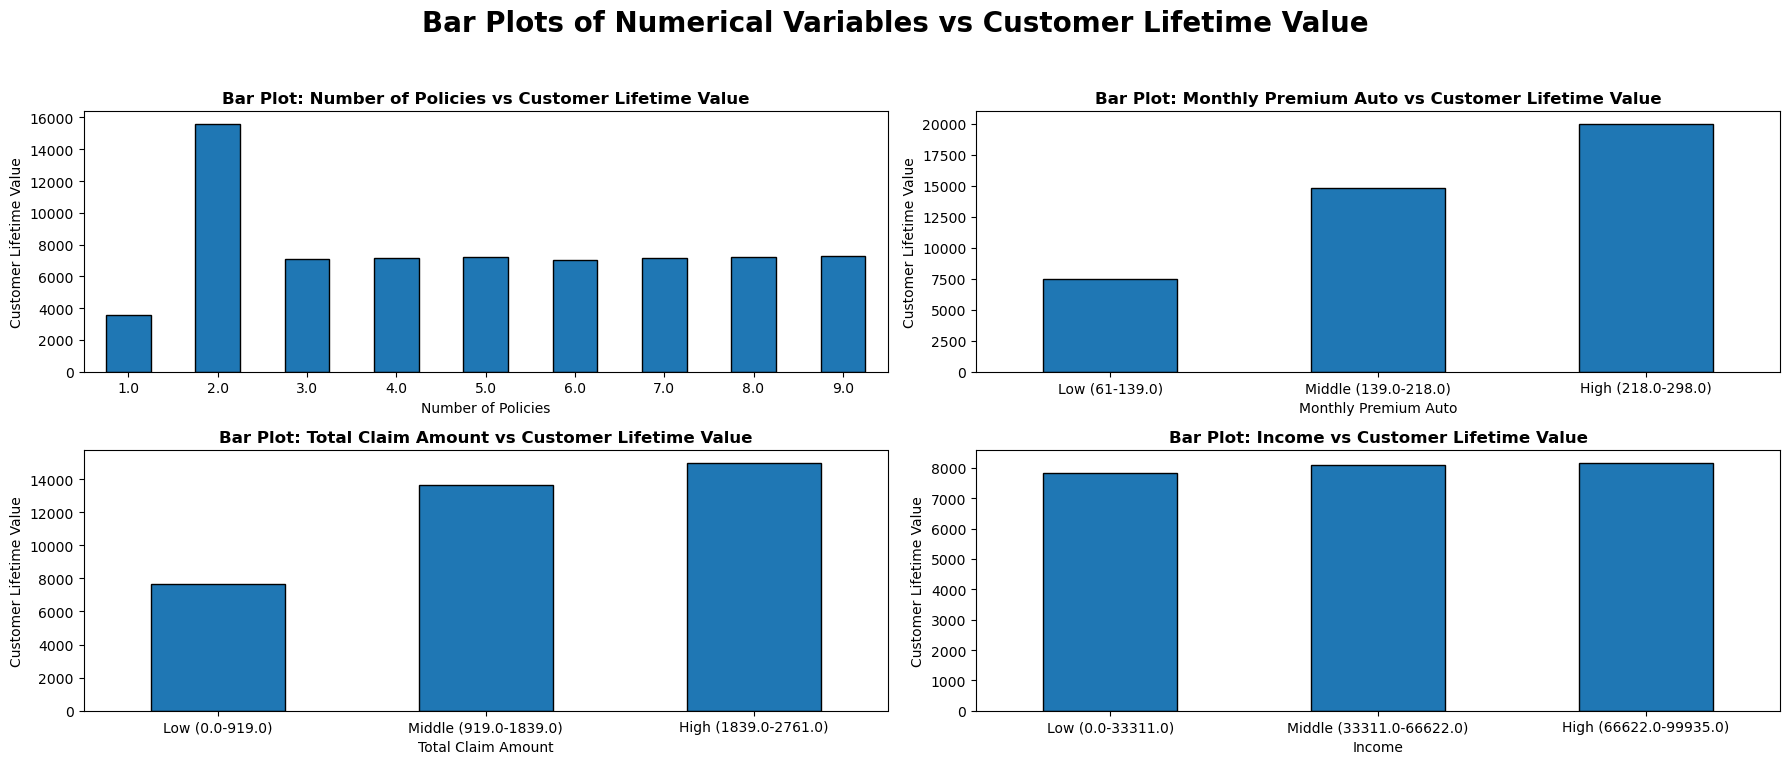

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Definisi kolom target untuk barplot
target = 'Customer Lifetime Value'

# Membuat figure dan axes
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 8))  # 4 plots, 2 baris x 2 kolom
axes = axes.flatten()  # Flatten the axes array untuk memudahkan indexing

# Mengiterasi melalui setiap variabel numerik kecuali 'Customer Lifetime Value' untuk barplot
for i, col in enumerate([c for c in column_numeric if c != target]):
    ax = axes[i]
    
    if col == 'Number of Policies':
        # Menghitung rata-rata Customer Lifetime Value tanpa binning
        mean_clv = df_train.groupby(col)[target].mean()
    else:
        # Start bins from 0 for Total Claim Amount and Income, and from 61 for Monthly Premium Auto
        if col in ['Total Claim Amount', 'Income']:
            start = 0
        elif col == 'Monthly Premium Auto':
            start = 61
        
        # Calculate maximum value and bin edges
        max_val = df_train[col].max()
        bin_edges = np.linspace(start, max_val, num=4)  # 3 bins require 4 edges
        bin_edges = [np.floor(edge) for edge in bin_edges]  # Make sure to floor the edges to avoid floating point issues
        if col == 'Monthly Premium Auto':
            bin_edges[0] = 61  # Explicitly set the first edge for Monthly Premium Auto
        bin_edges[-1] = np.ceil(max_val) + 1  # Adjust the last edge to ensure it includes the max value
        
        # Create labels with range
        labels = [f'Low ({bin_edges[0]}-{bin_edges[1]})', 
                  f'Middle ({bin_edges[1]}-{bin_edges[2]})', 
                  f'High ({bin_edges[2]}-{bin_edges[3]})']
        
        # Create binned column with labels
        binned_col = pd.cut(df_train[col], bins=bin_edges, labels=labels, include_lowest=True, right=False)
        
        mean_clv = df_train.groupby(binned_col)[target].mean()
    
    # Membuat barplot untuk setiap bin
    mean_clv.plot(kind='bar', ax=ax, edgecolor='black')
    ax.set_title(f'Bar Plot: {col} vs {target}', fontsize=12, fontweight='bold')
    ax.set_xlabel(col)
    ax.set_ylabel(target)
    ax.tick_params(axis='x', rotation=0)  # Rotate x-axis labels

# Menghapus axes yang tidak digunakan jika jumlah variabel numerik kurang dari jumlah subplot yang tersedia
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Bar Plots of Numerical Variables vs Customer Lifetime Value', fontsize=20, fontweight='bold')    

# Menyesuaikan layout dan menampilkan plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**TEMUAN**

Berdasarkan hasil analisa bivariat fitur numerik dari demografi (Income) dan atribut polis asuransi (Monthly Premitum Auto, Total Claim Amount, dan Income) customer terhadap rata-rata nilai Customer Lifetime Value menunjukan bahwa:

1. `Number of Policies` <br>
Tidak terlihat adanya korelasi antara nilai Customer Lifetime Value dengan jumlah polis asuransi yang dimiliki customer, dimana rata-rata Customer Lifetime Value pada setiap jumlah polis relatif sama, hanya saja rata-rata Customer Lifetime Value customer dengan jumlah polis 1 lebih rendah ±50% dibanding customer pemilik 3-8 polis. Sementara itu, customer dengan jumlah polis 2 memiliki rata-rata Customer Lifetime Value ±2 kali lipat/±100% lebih banyak dibandingkan customer pemilik 3-8 polis. <br><br>

2. `Monthly Premium Auto` <br>
Terdapat korelasi antara nilai Customer Lifetime Value dengan nominal premi bulanan yang harus dibayar customer, semakin tinggi nominal premi bulanan yang dibayarkan customer maka semakin tinggi pula nilai Customer Lifetime Value customer tersebut. <br><br>

3. `Total Claim Amount` <br>
Terdapat korelasi antara nilai Customer Lifetime Value dengan jumlah klaim yang diajukan customer, semakin tinggi jumlah klaim yang diajukan customer maka semakin tinggi pula nilai Customer Lifetime Value customer tersebut. <br><br>

4. `Income` <br>
Tidak terlihat adanya korelasi antara nilai Customer Lifetime Value dengan pendapatan customer, dimana rata-rata Customer Lifetime Value menunjukan trend yang linear pada setiap kelas pendapatan, artinya setiap kelas pendapatan menunjukan rata-rata Customer Lifetime Value yang relatif sama atau berdekatan.

> ## 2.5. DATA PREPROCESSING

**HANDLING ERROR FORMAT**

In [14]:
#Mengubah nama kolom Response menjadi AcceptedCmp6
df_train.rename(columns={'EmploymentStatus' : 'Employment Status'}, inplace= True)

**TEMUAN**

Berdasarkan hasil analisa pada tahap *Handling Outlier*, ditemukan:

1. `EmploymentStatus`<br>
Dilakukan penyesuaian pada nama kolom "EmploymentStatus" menjadi "Employment Status" untuk menghindari kekeliruan, mengingat semua kolom lainnya menggunakan spasi.

**HANDLING MISSING VALUE**

In [15]:
#menampilkan jumlah data missing pada setiap kolom
pd.DataFrame(data = df_train.isna().sum(),
            columns = ['Missing Values'])

,Missing Values
Vehicle Class,0
Coverage,0
Renew Offer Type,0
Employment Status,0
Marital Status,0
Education,0
Number of Policies,0
Monthly Premium Auto,0
Total Claim Amount,0
Income,0


**TEMUAN**

Berdasarkan hasil analisa pada tahap *Handling Missing Value*, ditemukan:

- Tidak terdeteksi adanya kolom dengan value yang hilang

**HANDLING OUTLIERS**

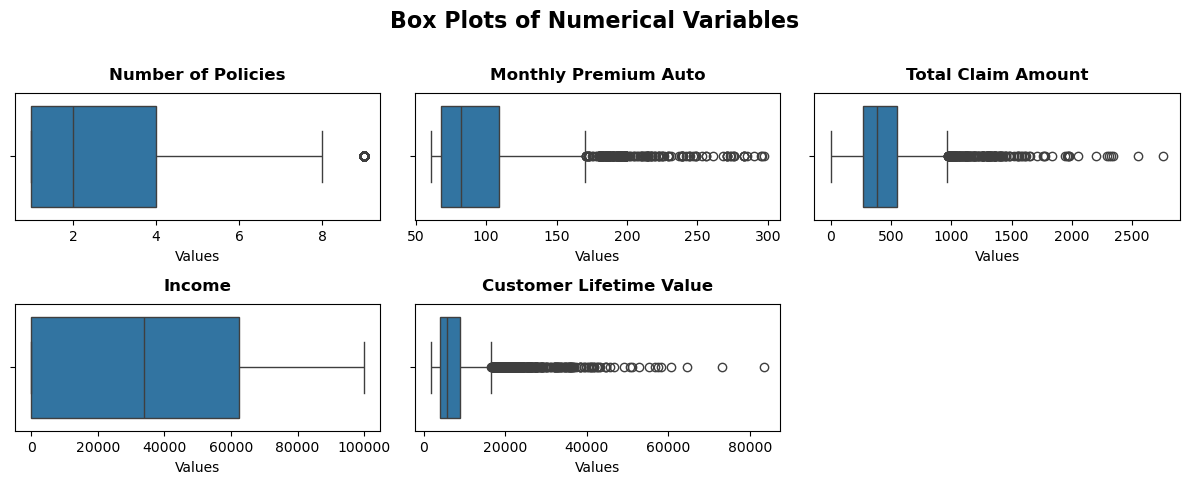

In [16]:
# Membuat plot boxplot horizontal
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 5))

axes = axes.flatten()

for i, col in enumerate(column_numeric):
    sns.boxplot(data=df_train, x=col, ax=axes[i])
    axes[i].set_title(f'{col}', pad=10, fontweight='bold', fontsize=12)
    axes[i].set_xlabel('Values')
    axes[i].set_ylabel('')

# Hapus subplot kosong jika kolom numerik kurang dari subplot yang disediakan
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Box Plots of Numerical Variables', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0.02, 1, 0.97])
plt.show()

In [17]:
# Menghitung IQR
Q1 = df_train['Number of Policies'].quantile(0.25)
Q3 = df_train['Number of Policies'].quantile(0.75)
IQR = Q3 - Q1

# Mendapatkan batas bawah dan atas untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menemukan outlier
outliers = df_train[(df_train['Number of Policies'] < lower_bound) | (df_train['Number of Policies'] > upper_bound)]

#Menampilkan Outlier
outliers.head(5)

,Vehicle Class,Coverage,Renew Offer Type,Employment Status,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
4839,Four-Door Car,Basic,Offer2,Medical Leave,Single,College,9.0,63.0,302.400000,22571.0,4605.036646
203,Two-Door Car,Extended,Offer2,Retired,Married,Bachelor,9.0,83.0,398.400000,27681.0,6057.072080
5402,Four-Door Car,Premium,Offer1,Disabled,Single,Bachelor,9.0,113.0,813.600000,23506.0,8564.772996
2741,Four-Door Car,Premium,Offer1,Employed,Married,Bachelor,9.0,105.0,108.025547,98677.0,8531.401125
2504,Four-Door Car,Extended,Offer1,Employed,Married,Bachelor,9.0,88.0,142.062768,41837.0,6966.694527


In [18]:
# Menghitung persentase outlier
percentage_outliers = len(outliers) / len(df_train) * 100

# Menampilkan jumlah dan persentase data outlier pada 
print(f'Jumlah data outlier pada kolom "Number of Policies" : {len(outliers)}')
print(f'Persentase data outlier pada kolom "Number of Policies" : {percentage_outliers}')

Jumlah data outlier pada kolom "Number of Policies" : 215
Persentase data outlier pada kolom "Number of Policies" : 4.740904079382579


In [19]:
# Membuang data outlier
df_train = df_train[~((df_train['Number of Policies'] < lower_bound) | (df_train['Number of Policies'] > upper_bound))]
print(f"Jumlah data setelah menghapus outlier: {len(df_train)}")

Jumlah data setelah menghapus outlier: 4320


**TEMUAN**

Berdasarkan hasil analisa pada tahap *Handling Outlier*, diketahui bahwa terdapat beberapa value yang dikategorikan sebagai "outlier" pada beberapa kolom di dataset. Data dengan value "outlier" kemudian diseleksi kembali untuk memisahkan data yang akan dihapus dan dipertahankan, diantaranya:

1. `Number of Policies` <br>
Terdapat 215 data yang dianggap sebagai outlier pada fitur ini. Data tersebut kemudian dihapus dikarenakan jumlahnya yang relatif sedikit (4,7%) dan bila dipertahankan, khawatir akan mengurangi akurasi hasil analisa. Selain itu, berdasarkan hasil analisa bivariat, tidak ada korelasi yang signifikan antara fitur ini dengan nilai Customer Lifetime Value. <br><br>

2. `Monthly Premium Auto`, `Total Claim Amount`, `Income` <br>
Terdapat data yang dianggap sebagai outlier pada fitur ini. Data tersebut akan dipertahankan atau tidak akan dihapus dikarenakan fitur ini memiliki korelasi yang cukup signifikan terhadap nilai Customer Lifetime Value dan data masih relevan. Outlier ini dianggap sebagai representasi data dengan nilai tinggi yang mencermikan nilai CLV yang tinggi untuk dipelajari oleh model. <br><br>

3. `Customer Lifetime Value`<br>
Terdapat data CLV yang tergolong sebagai outlier. Data ini akan dipertahankan dikarenakan nilai nya yang masih releva dan sebagai representasi dari nilai CLV yang tinggi.

**HANDLING DUPLICATE**

In [20]:
#Kriteria data duplikat adalah data yang memiliki value identik (sama) diseluruh kolom yang tersedia
df_train[df_train.duplicated(subset=df_train.columns)]
df_train.duplicated().value_counts()

False    3891
True      429
Name: count, dtype: int64

In [21]:
# Melihat data yang dianggap sebagai duplikat
duplicate_data = pd.concat([df_train,pd.DataFrame(df_train.duplicated(subset=df_train.columns))], axis=1)
duplicate_data[duplicate_data[0] == True]

,Vehicle Class,Coverage,Renew Offer Type,Employment Status,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value,0
4477,Four-Door Car,Basic,Offer2,Employed,Single,Bachelor,6.0,72.0,471.443077,74015.0,5555.830205,True
3185,Four-Door Car,Premium,Offer2,Employed,Married,High School or Below,2.0,115.0,256.438030,81872.0,14024.358390,True
5372,Four-Door Car,Basic,Offer2,Employed,Single,Bachelor,6.0,72.0,471.443077,74015.0,5555.830205,True
555,Four-Door Car,Basic,Offer2,Unemployed,Married,College,2.0,66.0,316.800000,0.0,7200.664877,True
2140,Four-Door Car,Premium,Offer1,Unemployed,Married,College,1.0,105.0,504.000000,0.0,3885.456401,True
5557,SUV,Basic,Offer1,Retired,Divorced,College,3.0,106.0,508.800000,21073.0,7805.312870,True
14,Four-Door Car,Basic,Offer2,Retired,Divorced,Bachelor,1.0,71.0,340.800000,18608.0,2538.626320,True
2231,SUV,Extended,Offer2,Retired,Divorced,High School or Below,1.0,133.0,638.400000,20993.0,4772.943848,True
507,Two-Door Car,Extended,Offer2,Employed,Married,Bachelor,2.0,88.0,631.743039,72540.0,10656.881950,True
737,Two-Door Car,Basic,Offer1,Disabled,Single,High School or Below,3.0,61.0,292.800000,11904.0,4254.620669,True


In [22]:
# Memastikan memang terdapat duplikat data berdasarkan nilai Customer Lifetime Value
duplicate_data[duplicate_data['Customer Lifetime Value']==9048.983447]

,Vehicle Class,Coverage,Renew Offer Type,Employment Status,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value,0
5026,Sports Car,Basic,Offer2,Unemployed,Married,High School or Below,3.0,119.0,571.2,0.0,9048.983447,False
2105,Sports Car,Basic,Offer2,Unemployed,Married,High School or Below,3.0,119.0,571.2,0.0,9048.983447,True
182,Sports Car,Basic,Offer2,Unemployed,Married,High School or Below,3.0,119.0,571.2,0.0,9048.983447,True
188,Sports Car,Basic,Offer2,Unemployed,Married,High School or Below,3.0,119.0,571.2,0.0,9048.983447,True


In [23]:
#Kriteria data duplikat adalah data yang memiliki value identik (sama) diseluruh kolom yang tersedia
df_train[df_train.duplicated(subset=df_train.columns)]

# Melihat jumlah data yang duplikat dan tidak duplikat
print(f'''Sebelum dilakukan penanganan data duplikat:
{df_train.duplicated().value_counts()}''')

# Membuang data duplicate
df_train.drop_duplicates(subset=df_train.columns, keep='first', inplace= True)

# Memastikan data duplikat telah dihapus
print(f'''
Setelah dilakukan penanganan data duplikat:
{df_train.duplicated().value_counts()}''')

Sebelum dilakukan penanganan data duplikat:
False    3891
True      429
Name: count, dtype: int64

Setelah dilakukan penanganan data duplikat:
False    3891
Name: count, dtype: int64


**TEMUAN**

Berdasarkan hasil analisa pada tahap *Handling Duplicate*, ditemukan hal-hal berikut:

- Sebanyak 429 data teridentifikasi sebagai duplikat. Data tersebut telah dihapus dengan tujuan untuk memastikan bahwa analisa dilakukan pada data yang unik dan bebas dari pengaruh duplikasi, yang dapat menyebabkan distorsi dalam hasil analisis.

# 3. MODELING

> ## 3.1 FEATURE ENGINEERING

#### ORDINAL ENCODING

In [24]:
# Melakukan Ordinal Encoder pada feature Vechicle Class, Coverage, Renew Offer Type, dan Education

# Encoding feature Vechicle Class
df_train['Vehicle Class Encoded'] = np.where(df_train['Vehicle Class'] == 'Four-Door Car', 1, 
                                    np.where(df_train['Vehicle Class'] == 'Two-Door Car', 2, 
                                    np.where(df_train['Vehicle Class'] == 'SUV', 3,
                                    np.where(df_train['Vehicle Class'] == 'Sports Car', 4, 
                                    np.where(df_train['Vehicle Class'] == 'Luxury Car', 5,6 )))))

# Encoding feature Coverage
df_train['Coverage Encoded'] =  np.where(df_train['Coverage'] == 'Basic', 1, 
                                np.where(df_train['Coverage'] == 'Extended', 2, 3 ))

# Encoding feature Renew Offer Type
df_train['Renew Offer Type Encoded'] =  np.where(df_train['Renew Offer Type'] == 'Offer4', 1, 
                                        np.where(df_train['Renew Offer Type'] == 'Offer2', 2,
                                        np.where(df_train['Renew Offer Type'] == 'Offer3', 3, 4 )))

# Encoding feature Education
df_train['Education Encoded'] = np.where(df_train['Education'] == 'Doctor', 1, 
                                np.where(df_train['Education'] == 'College', 2, 
                                np.where(df_train['Education'] == 'Bachelor', 3,
                                np.where(df_train['Education'] == 'High School or Below', 4, 5))))

**PENJELASAN**

Dilakukan metode *ordinal encoding* berdasarkan tingkatan nilai yang ditentukan dari hasil analisis bivariat terhadap kolom-kolom berikut: Vehicle Class, Coverage, Renew Offer Type, dan Education. 

Pendekatan ini dipilih untuk mengubah nilai kategorik dalam fitur tersebut menjadi numerik dengan format yang dapat mempertahankan informasi yang relevan dari tingkatan setiap fitur dan dapat diolah pada tahap feature selection dan modeling menggunakan machine learning.

**MULTICOLLINEARITY ANALYSIS**

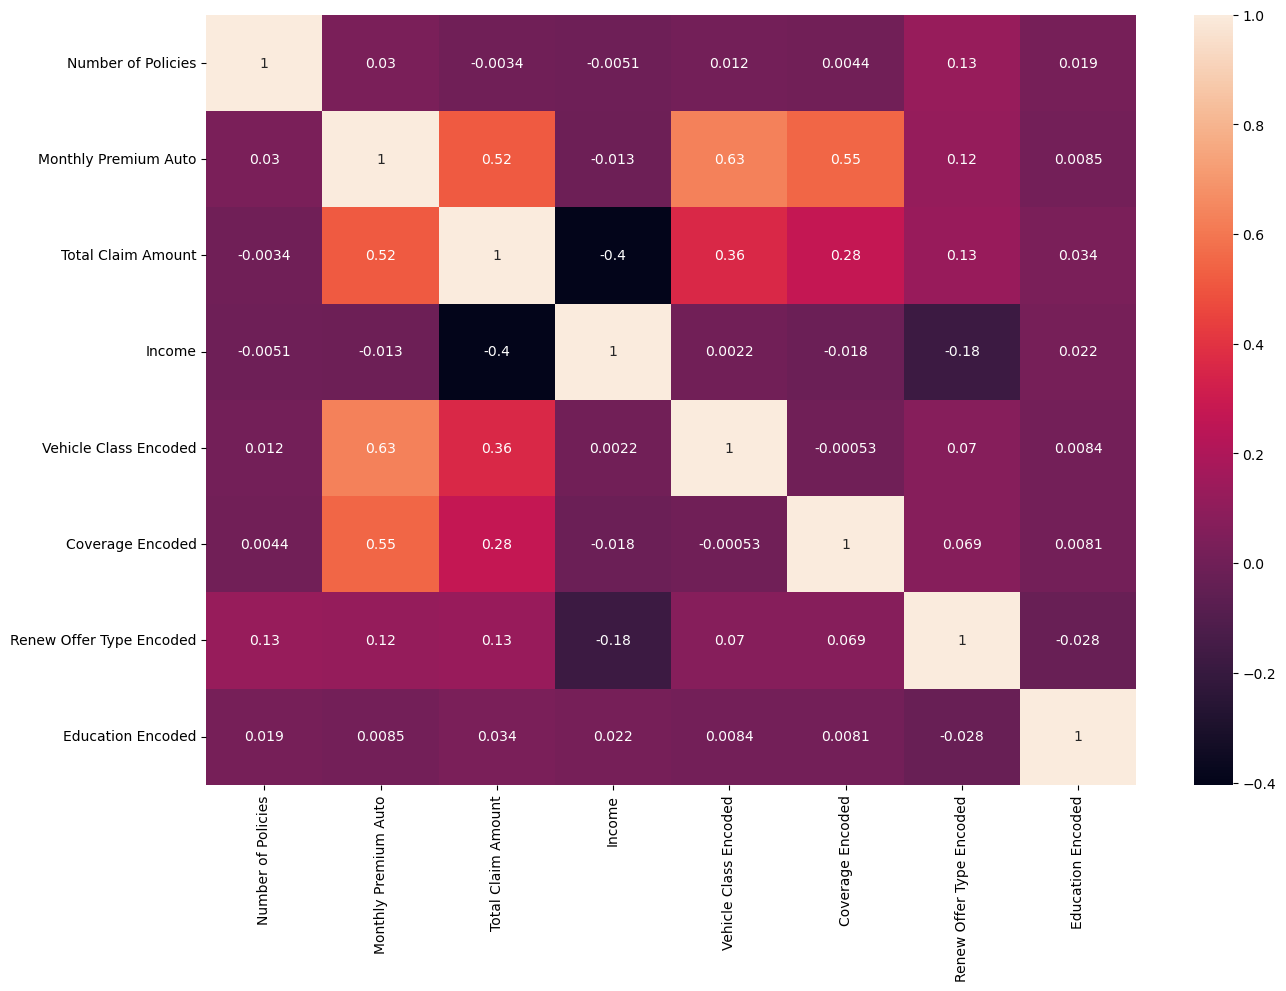

In [25]:
plt.figure(figsize=(15,10))
sns.heatmap(df_train.drop(columns=['Customer Lifetime Value']).select_dtypes(include='number').corr(method='spearman'),annot=True)
plt.show()

**TEMUAN**

Berdasarkan hasil analisa pada tahap *multicollinearity analysis*, ditemukan:

- Tidak terdapat adanya korelasi yang tinggi antar masing-masing fitur yang dapat melibatkan kekeliruan dalam penafsiran koefisien model.

#### FEATURE IMPORTANCE ANALYSIS

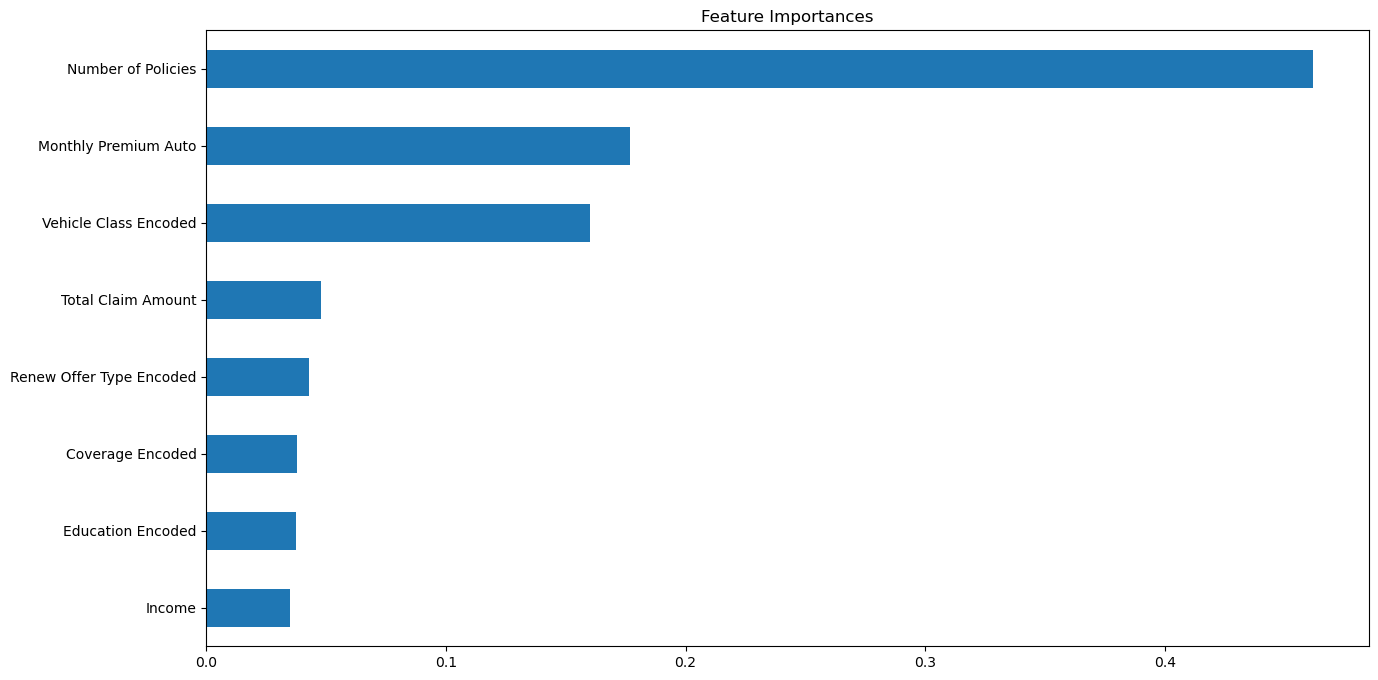

In [26]:
from xgboost import XGBRegressor

X_train_feat = df_train.drop(columns=['Customer Lifetime Value']).select_dtypes(include='number')

xgb=XGBRegressor()
xgb.fit(X_train_feat,df_train['Customer Lifetime Value'])
xgb_coef1 = pd.Series(xgb.feature_importances_, X_train_feat.columns).sort_values(ascending = True)
plt.figure(figsize=(15,8))
xgb_coef1.iloc[:10].plot(kind='barh', title='Feature Importances')
plt.show()

Berdasarkan hasil analisa pada tahap *feature importance analysis*, ditemukan:

- Terdapat tiga fitur yang memiliki tingkat signifikansi yang tinggi dalam *feature importance* yaitu Number of Polices, Monthly Premium Auto, dan Vehicle Class yang sudah di-*encode*, fitur ini akan memberikan kontribusi yang signifikan dalam memprediksi nilai CLV (Customer Lifetime Value).

> ## 3.2. MODELING 

#### SPLIT DATA TRAIN

In [27]:
# Memisahkan Target dengan Feature pada data train
X_train = df_train.drop(columns=['Customer Lifetime Value', 'Vehicle Class', 'Coverage', 'Renew Offer Type', 'Education'])
y_train = df_train['Customer Lifetime Value']

#### MODELING

Pada tahap ini, digunakan *pipeline* yang mencakup langkah-langkah penting dalam pemrosesan data dan pemodelan untuk memprediksi Customer Lifetime Value (CLV), meliputi:

**Data Preprocessing**

- `Scaling`: Dilakukan robust scaling pada kolom `'Number of Policies', 'Monthly Premium Auto', 'Total Claim Amount', dan 'Income'` untuk menyesuaikan skala data numerik. `Robust scaling` dipilih karena metode ini lebih tahan terhadap outlier dan mempertahankan distribusi data yang lebih stabil. Scaler ini bekerja dengan menggunakan medians dan quartile ranges (IQR) untuk penskalaan, sehingga lebih stabil.
- `Encoding`: Menggunakan `OneHotEncoder` untuk kolom `'Employment Status' dan 'Marital Status'` guna mengonversi variabel kategori menjadi bentuk biner yang dapat diproses oleh model. Pendekatan ini dipilih untuk mempertahankan informasi kategori pada fitur dengan jumlah unique value yang relatif rendah. Encoder ini bekerja dengan mengonversi variabel kategori menjadi representasi biner, di mana setiap kategori diubah menjadi vektor biner dengan nilai 0 atau 1.
- `Feature Engineering`: Melibatkan `seleksi fitur` menggunakan `SelectKBest` untuk memilih fitur-fitur terbaik yang berkontribusi signifikan dalam prediksi CLV. SelectKBest berkerja dengan menggunakan skor statistik untuk memilih K fitur terbaik yang paling signifikan terhadap target variabel.

**Pipeline Model**
- Kombinasi dari preprocessing dan pemodelan dalam satu *pipeline* untuk memastikan konsistensi dan efisiensi dalam penggunaan model.  <br>

**Cross-Validation**
- Penggunaan `*cross-validation*` dengan metode `*grid search CV*` untuk menentukan model terbaik.*Grid search CV* bekerja dengan melakukan iterasi pada kombinasi hyperparameter model untuk memilih yang optimal, kemudian *cross-validation* membagi data menjadi beberapa lipatan untuk mengukur kinerja model secara obyektif dan memastikan generalisasi yang baik.

In [28]:
import tempfile
from catboost import CatBoostRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

In [29]:
# Pipeline untuk preprocessing numerik dan kategorik
preprocessor = ColumnTransformer(transformers=[
        ('Numerical', Pipeline([('scaler', RobustScaler())]), ['Number of Policies', 'Monthly Premium Auto', 'Total Claim Amount','Income']),
        ('Categorical', Pipeline([('encoder', OneHotEncoder(handle_unknown='ignore'))]), ['Employment Status','Marital Status'])
#       ('Categorical', Pipeline([('encoder', OrdinalEncoder())]), ['Vehicle Class','Coverage','Renew Offer Type','Education'])
],remainder='passthrough')

# Definisikan pipeline tanpa classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selection', SelectKBest(score_func=f_regression)),
    ('regressor', LinearRegression()) 
])

# # Mendapatkan tempat kerja sementara untuk CatBoost
# catboost_working_dir = tempfile.mkdtemp()

# Parameter grid yang diperluas
param_grid = [
    {
        'feature_selection__k': [5, 15],
        'regressor': [LinearRegression()]
    },
    {
        'feature_selection__k': [5, 15],
        'regressor': [KNeighborsRegressor()],
        'regressor__n_neighbors': [3, 5, 7, 9],
        'regressor__weights': ['uniform', 'distance']
    },
    {
        'feature_selection__k': [5, 15],
        'regressor': [DecisionTreeRegressor()],
        'regressor__max_depth': [None, 10, 20, 30],
        'regressor__min_samples_split': [2, 5, 10],
        'regressor__min_samples_leaf': [1, 2, 4]
    },
    {
        'feature_selection__k': [5, 15],
        'regressor': [RandomForestRegressor()],
        'regressor__n_estimators': [50, 100, 200],
        'regressor__max_depth': [None, 10, 20],
        'regressor__min_samples_split': [2, 5],
        'regressor__min_samples_leaf': [1, 4]
    },
    {
        'feature_selection__k': [5, 15],
        'regressor': [XGBRegressor()],
        'regressor__n_estimators': [50, 100, 200],
        'regressor__max_depth': [3, 6, 9],
        'regressor__learning_rate': [0.01, 0.1, 0.2],
        'regressor__subsample': [0.6, 0.8, 1.0]
    },
    {
        'feature_selection__k': [5, 15],
        'regressor': [SVR()],
        'regressor__C': [0.1, 1, 10, 100],
        'regressor__epsilon': [0.01, 0.1, 1],
        'regressor__kernel': ['linear', 'poly', 'rbf']
    },
    {
        'feature_selection__k': [5, 15],
        'regressor': [GradientBoostingRegressor()],
        'regressor__n_estimators': [50, 100, 200],
        'regressor__learning_rate': [0.01, 0.1, 0.2],
        'regressor__max_depth': [3, 5, 7]
    },
    {
        'feature_selection__k': [5, 15],
        'regressor': [AdaBoostRegressor()],
        'regressor__n_estimators': [50, 100, 200],
        'regressor__learning_rate': [0.01, 0.1, 0.2]
    }
#     ,
#     {
#         'feature_selection__k': [5, 15],
#         'regressor': [CatBoostRegressor(verbose=0, train_dir=catboost_working_dir)],
#         'regressor__iterations': [100, 200, 300],
#         'regressor__depth': [3, 6, 9],
#         'regressor__learning_rate': [0.01, 0.1, 0.2],
#         'regressor__l2_leaf_reg': [1, 3, 5]
#     }
]

# Buat GridSearchCV dengan pipeline
gscv = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='neg_mean_absolute_error', error_score='raise')

# Fit GridSearchCV ke data
gscv.fit(X_train, y_train)

# Menampilkan hasil terbaik
print("Best parameters found: ", gscv.best_params_)
print("Best score: ", gscv.best_score_)

Best parameters found:  {'feature_selection__k': 15, 'regressor': RandomForestRegressor(), 'regressor__max_depth': 10, 'regressor__min_samples_leaf': 4, 'regressor__min_samples_split': 5, 'regressor__n_estimators': 50}
Best score:  -1665.4699750326886


In [30]:
best_model = gscv.best_estimator_
best_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  ['Number of Policies',
                                                   'Monthly Premium Auto',
                                                   'Total Claim Amount',
                                                   'Income']),
                                                 ('Categorical',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Employment Status',
                                                   'Marital Status'])])),
                ('feature_selection',
                 SelectKBest(k=15,
                             score_func=<function f_regression at 0x000001D00C0A4B80>)),
                ('regressor',
                 RandomForestRegressor(max_depth=10, min_samples_leaf=4,
                                       min_samples_split=5, n_estimators=50))])

In [31]:
pd.DataFrame(gscv.cv_results_).sort_values(by='rank_test_score', ascending=True).head(1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_feature_selection__k,param_regressor,param_regressor__n_neighbors,param_regressor__weights,param_regressor__max_depth,param_regressor__min_samples_leaf,param_regressor__min_samples_split,param_regressor__n_estimators,param_regressor__learning_rate,param_regressor__subsample,param_regressor__C,param_regressor__epsilon,param_regressor__kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
147,0.401665,0.004106,0.011834,0.001228,15,RandomForestRegressor(),NaN,NaN,10,4,5,50,NaN,NaN,NaN,NaN,NaN,"{'feature_selection__k': 15, 'regressor': RandomForestRegressor(), 'regressor__max_depth': 10, 'regressor__min_samples_leaf': 4, 'regressor__min_samples_split': 5, 'regressor__n_estimators': 50}",-1742.059365,-1761.554988,-1692.149136,-1455.276642,-1676.309744,-1665.469975,109.643768,1


In [32]:
# Extract the SelectKBest step
select_k_best = gscv.best_estimator_.named_steps['feature_selection']

# Extract the column transformer steps
column_transformer = gscv.best_estimator_.named_steps['preprocessor']

# Get the feature names after one-hot encoding
num1_feature_names= column_transformer.named_transformers_['Numerical'].get_feature_names_out(['Number of Policies', 'Monthly Premium Auto', 'Total Claim Amount','Income'])

ohe_feature_names = column_transformer.named_transformers_['Categorical'].get_feature_names_out(['Employment Status','Marital Status'])

passthrough_feature_names = X_train.columns.difference(['Number of Policies', 'Monthly Premium Auto', 'Total Claim Amount', 'Income', 'Employment Status', 'Marital Status']).tolist()

feat_cols = list(num1_feature_names) + list(ohe_feature_names) + list(passthrough_feature_names)

# select_k_best.get_feature_names_out(feat_cols)

**TEMUAN**

**Model Terbaik**

Setelah menjalankan proses cross-validation dan pipeline yang telah disusun, diidentifikasi bahwa model terbaik untuk memprediksi Customer Lifetime Value (CLV) adalah `RandomForestRegressor` yang telah dituning dengan parameter spesifik, yaitu `max_depth=10, min_samples_leaf=4, dan min_samples_split=5`.

RandomForestRegressor bekerja dengan menggabungkan prediksi dari banyak pohon keputusan (decision trees) yang dibangun secara independen. Setiap pohon dalam RandomForestRegressor membagi data secara acak berdasarkan sejumlah fitur, dan hasil prediksi dari semua pohon digabungkan untuk memberikan prediksi akhir. Pendekatan ini membantu mengurangi overfitting dan meningkatkan akurasi prediksi dengan mengambil keputusan berdasarkan mayoritas hasil dari berbagai pohon keputusan yang terlatih secara independen.

**Fitur Terpilih**

Pada tahap seleksi fitur menggunakan SelectKBest, kami menentukan untuk menggunakan `15 fitur yang paling berkontribusi dalam prediksi`, yang meliputi:
- Number of Policies
- Monthly Premium Auto
- Total Claim Amount
- Income
- Employment Status_Disabled
- Employment Status_Employed
- Employment Status_Medical Leave
- Employment Status_Retired
- Employment Status_Unemployed
- Marital Status_Married
- Marital Status_Single
- Coverage Encoded
- Education Encoded
- Renew Offer Type Encoded
- Vehicle Class Encoded

**Nilai Error**

Hasil evaluasi menunjukkan bahwa model ini memberikan nilai `Mean Absolute Error (MAE) terendah sebesar -1663.2444671522703`, yang mengindikasikan bahwa rata-rata kesalahan absolut antara nilai prediksi dan nilai sebenarnya relatif rendah.

> ## 3.3. PREDICT DATA TEST

#### EXPERIMENT 1

In [33]:
#Mengubah nama kolom Response menjadi AcceptedCmp6
df_test.rename(columns={'EmploymentStatus' : 'Employment Status'}, inplace= True)

In [34]:
# Melakukan Ordinal Encoder pada feature Vechicle Class, Coverage, Renew Offer Type, dan Education

# Encoding feature Vechicle Class
df_test['Vehicle Class Encoded'] = np.where(df_test['Vehicle Class'] == 'Four-Door Car', 1, 
                                    np.where(df_test['Vehicle Class'] == 'Two-Door Car', 2, 
                                    np.where(df_test['Vehicle Class'] == 'SUV', 3,
                                    np.where(df_test['Vehicle Class'] == 'Sports Car', 4, 
                                    np.where(df_test['Vehicle Class'] == 'Luxury Car', 5,6 )))))

# Encoding feature Coverage
df_test['Coverage Encoded'] =  np.where(df_test['Coverage'] == 'Basic', 1, 
                                np.where(df_test['Coverage'] == 'Extended', 2, 3 ))

# Encoding feature Renew Offer Type
df_test['Renew Offer Type Encoded'] =  np.where(df_test['Renew Offer Type'] == 'Offer4', 1, 
                                        np.where(df_test['Renew Offer Type'] == 'Offer2', 2,
                                        np.where(df_test['Renew Offer Type'] == 'Offer3', 3, 4 )))

# Encoding feature Education
df_test['Education Encoded'] = np.where(df_test['Education'] == 'Doctor', 1, 
                                np.where(df_test['Education'] == 'College', 2, 
                                np.where(df_test['Education'] == 'Bachelor', 3,
                                np.where(df_test['Education'] == 'High School or Below', 4, 5))))

In [35]:
# Memisahkan Target dengan Feature pada data train
X_test = df_test.drop(columns=['Customer Lifetime Value', 'Vehicle Class', 'Coverage', 'Renew Offer Type', 'Education'])
y_test = df_test['Customer Lifetime Value']

In [36]:
# Melakukan prediksi pada data test
y_pred=gscv.best_estimator_.predict(X_test)

In [37]:
#modul metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

print('MSE',mean_squared_error(y_test, y_pred))
print('MAE',mean_absolute_error(y_test, y_pred))
print('RMSE',mean_squared_error(y_test, y_pred)**(0.5))

MSE 19858460.392938603
MAE 1795.0473026310447
RMSE 4456.28324873303


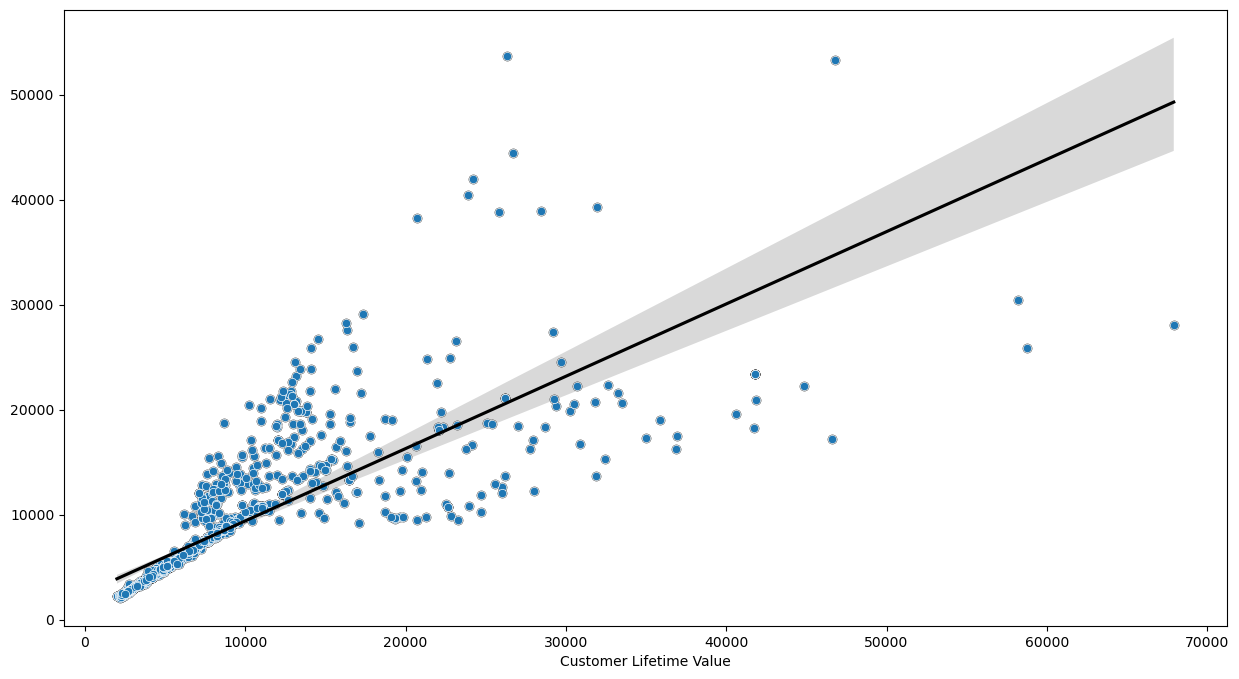

In [38]:
plt.figure(figsize=(15,8))
sns.regplot(x=y_test,y=y_pred,color='black')
sns.scatterplot(x=y_test,y=y_pred)
plt.show()

**TEMUAN**

Berdasarkan hasil pengujian pada data test, ditemuakan:

- `Mean Absolute Error (MAE)`: didapatkan nilai MAE dari model adalah sebesar `1814.31393213734`. MAE ini mengindikasikan rata-rata kesalahan absolut antara nilai CLV yang diprediksi oleh model dengan nilai CLV yang sebenarnya pada data test. Hal ini berarti prediksi CLV yang dilakukan model terhadap data test dapat meleset sebesar $1790. <br> <br>

> ## 3.5. CLV SEGMENTATION

In [39]:
# Merubah hasil prediksi ke dalam bentuk dataframe
y_pred_df=pd.DataFrame(y_pred)

# Merubah nama kolom hasil prediksi
y_pred_df.rename(columns={y_pred_df.columns[0]: 'CLV pred'}, inplace=True)

# Mencari rata-rata CLV customer
y_pred_df['CLV pred'].mean()
print(f'Rata-rata nilai Customer Lifetime Value hasil prediksi yaitu {y_pred_df["CLV pred"].mean()}')

# Melakukan segmentasi CLV berdasarkan nilai rata
y_pred_df['CLV Segment']=np.where(y_pred_df['CLV pred']>=8150.005287765097,'High','Low')
display(y_pred_df)

# Menghitung jumlah customer pada masing-masing segment
display(y_pred_df['CLV Segment'].value_counts())

Rata-rata nilai Customer Lifetime Value hasil prediksi yaitu 8157.371885049322


,CLV pred,CLV Segment
0,2603.181767,Low
1,11048.686888,High
2,9747.408490,High
3,13680.445966,High
4,3791.158478,Low
...,...,...
1129,7655.892961,Low
1130,2441.986285,Low
1131,5068.148438,Low
1132,5038.344643,Low


CLV Segment
Low     720
High    414
Name: count, dtype: int64

**TEMUAN**

Berdasarkan hasil analisis segmentasi, berikut adalah temuan utama:

1. Dari keseluruhan pelanggan yang dianalisis, terdapat `724 pelanggan yang memiliki nilai Customer Lifetime Value (CLV) rendah`. Hal ini menunjukkan bahwa kontribusi mereka terhadap pendapatan perusahaan relatif kecil.
2. Sebaliknya, terdapat `429 pelanggan yang memiliki nilai Customer Lifetime Value (CLV) tinggi`, menunjukkan bahwa pelanggan ini memberikan kontribusi signifikan terhadap pendapatan perusahaan dan memiliki potensi besar untuk menjadi pelanggan setia jangka panjang.

Segmentasi CLV ini dilakukan berdasarkan rata-rata CLV hasil prediksi. Pelanggan dengan nilai CLV di bawah rata-rata dikategorikan sebagai pelanggan dengan CLV rendah, sedangkan pelanggan dengan nilai CLV di atas rata-rata dikategorikan sebagai pelanggan dengan CLV tinggi.

> ## 3.5. FIT MODEL TO ALL DATA

#### PREPROCESS

Sebelum model diterapkan dan dilatih dengan keseluruhan data, diperlukan tahapan preprocessing yang identik dengan yang telah diterapkan pada data train sebelumnya. Hal ini penting untuk memastikan konsistensi dalam representasi data dan pengolahan yang tepat sebelum model mulai digunakan pada data baru.

Dengan melakukan preprocess yang konsisten, kita memastikan bahwa data yang digunakan untuk evaluasi atau prediksi memiliki struktur yang sesuai dengan data yang digunakan dalam pelatihan.

Langkah ini tidak hanya meminimalkan risiko kesalahan dalam interpretasi hasil model, tetapi juga mendukung kemampuan model untuk memberikan prediksi yang akurat dan stabil pada data baru yang belum pernah dilihat sebelumnya.

In [40]:
#Mengubah nama kolom Response menjadi AcceptedCmp6
df.rename(columns={'EmploymentStatus' : 'Employment Status'}, inplace= True)

In [41]:
# Menghitung IQR
Q1 = df['Number of Policies'].quantile(0.25)
Q3 = df['Number of Policies'].quantile(0.75)
IQR = Q3 - Q1

# Mendapatkan batas bawah dan atas untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menemukan outlier
outliers = df[(df['Number of Policies'] < lower_bound) | (df['Number of Policies'] > upper_bound)]

# Menghitung persentase outlier
percentage_outliers = len(outliers) / len(df) * 100

# Menampilkan jumlah dan persentase data outlier pada 
print(f'Jumlah data outlier pada kolom "Number of Policies" : {len(outliers)}')
print(f'Persentase data outlier pada kolom "Number of Policies" : {percentage_outliers}')

# Membuang data outlier
df = df[~((df['Number of Policies'] < lower_bound) | (df['Number of Policies'] > upper_bound))]
print(f"Jumlah data setelah menghapus outlier: {len(df)}")

Jumlah data outlier pada kolom "Number of Policies" : 264
Persentase data outlier pada kolom "Number of Policies" : 4.656905979890634
Jumlah data setelah menghapus outlier: 5405


In [42]:
#Kriteria data duplikat adalah data yang memiliki value identik (sama) diseluruh kolom yang tersedia
df[df.duplicated(subset=df.columns)]

# Melihat jumlah data yang duplikat dan tidak duplikat
print(f'''Sebelum dilakukan penanganan data duplikat:
{df.duplicated().value_counts()}''')

# Membuat variabel berisi data duplicate
duplicate_data = pd.concat([df,pd.DataFrame(df.duplicated(subset=df.columns))], axis=1)

# Membuang data duplicate
df.drop_duplicates(subset=df.columns, keep='first', inplace= True)

# Memastikan data duplikat telah dihapus
print(f'''
Setelah dilakukan penanganan data duplikat:
{df.duplicated().value_counts()}''')

Sebelum dilakukan penanganan data duplikat:
False    4823
True      582
Name: count, dtype: int64

Setelah dilakukan penanganan data duplikat:
False    4823
Name: count, dtype: int64


In [43]:
# Melakukan Ordinal Encoder pada feature Vechicle Class, Coverage, Renew Offer Type, dan Education

# Encoding feature Vechicle Class
df['Vehicle Class Encoded'] = np.where(df['Vehicle Class'] == 'Four-Door Car', 1, 
                                    np.where(df['Vehicle Class'] == 'Two-Door Car', 2, 
                                    np.where(df['Vehicle Class'] == 'SUV', 3,
                                    np.where(df['Vehicle Class'] == 'Sports Car', 4, 
                                    np.where(df['Vehicle Class'] == 'Luxury Car', 5,6 )))))

# Encoding feature Coverage
df['Coverage Encoded'] =  np.where(df['Coverage'] == 'Basic', 1, 
                                np.where(df['Coverage'] == 'Extended', 2, 3 ))

# Encoding feature Renew Offer Type
df['Renew Offer Type Encoded'] =  np.where(df['Renew Offer Type'] == 'Offer4', 1, 
                                        np.where(df['Renew Offer Type'] == 'Offer2', 2,
                                        np.where(df['Renew Offer Type'] == 'Offer3', 3, 4 )))

# Encoding feature Education
df['Education Encoded'] = np.where(df['Education'] == 'Doctor', 1, 
                                np.where(df['Education'] == 'College', 2, 
                                np.where(df['Education'] == 'Bachelor', 3,
                                np.where(df['Education'] == 'High School or Below', 4, 5))))

#### SAVE MODEL

In [44]:
# # # define feature and label
# X=df[df.drop(columns=['Customer Lifetime Value', 'Vehicle Class', 'Coverage', 'Renew Offer Type', 'Education'])]
# y=df['Customer Lifetime Value']

# #import modul
# import pickle

# # fitting
# best_model.fit_transform(X,y)

# # save with pickle
# pickle.dump(best_model, open('best_model_capstone3_Tigfhar.sav', 'wb'))

> ## 3.5. SHAP AND FEATURE IMPORTANCE 

#### FEATURE IMPORTANCE

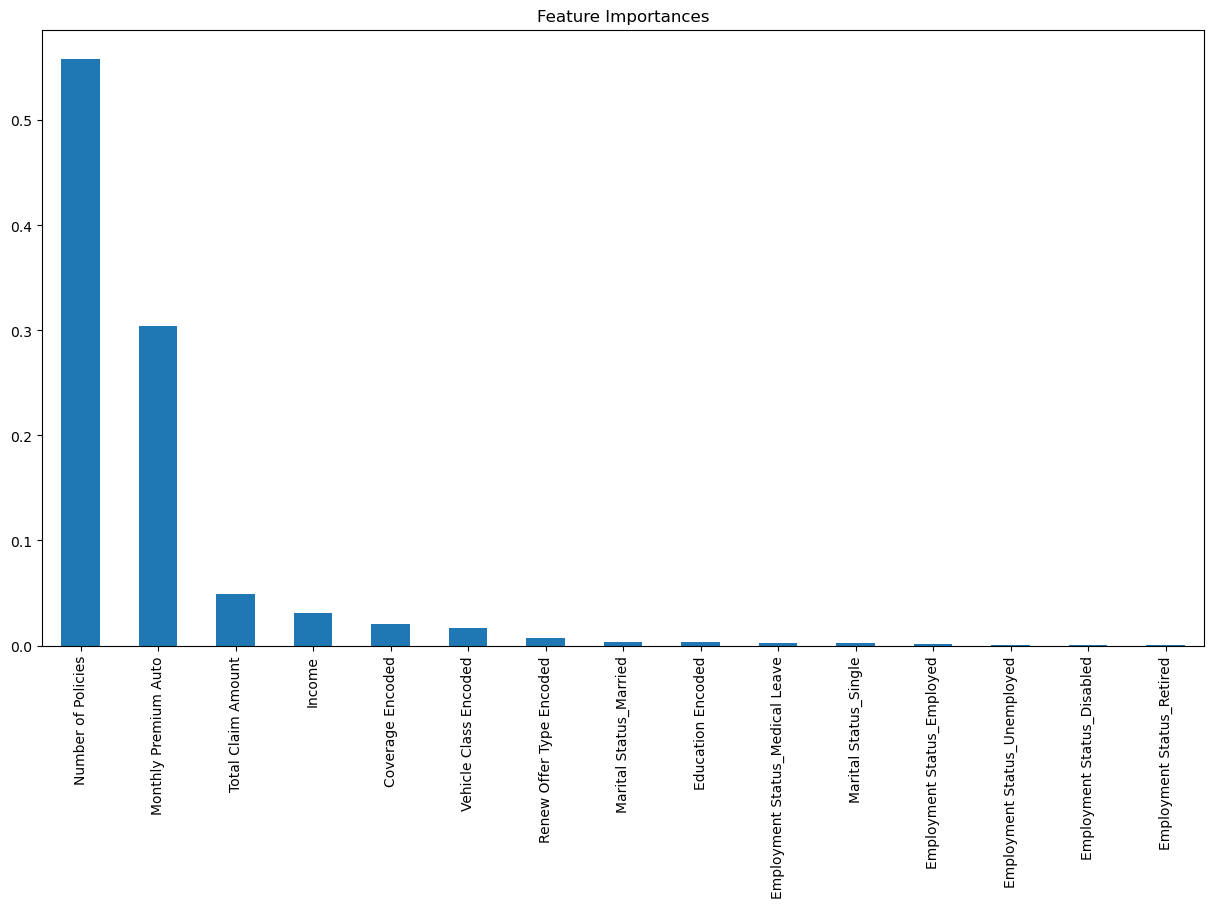

In [45]:
# Get feature importance from the best model
best_model = gscv.best_estimator_.named_steps['regressor']


feature_names = gscv.best_estimator_.named_steps['feature_selection'].get_support(indices=True)
selected_feature_names = np.array(feat_cols)[feature_names]


model_coef1 = pd.Series(best_model.feature_importances_, selected_feature_names).sort_values(ascending = False)
plt.figure(figsize=(15,8))
model_coef1.iloc[:50].plot(kind='bar', title='Feature Importances')
plt.show()

**PENJELASAN**

Diagram feature importance di atas menunjukkan kontribusi relatif dari setiap fitur terhadap prediksi nilai Customer Lifetime Value (CLV) dalam model yang digunakan. Berikut adalah penjelasan dari masing-masing fitur dan peranannya dalam model:

- `Number of Policies`: Fitur ini memiliki bobot terbesar dalam prediksi CLV, dengan importance di atas 0.5. Ini menunjukkan bahwa jumlah polis yang dimiliki oleh seorang pelanggan sangat mempengaruhi nilai CLV mereka. Pelanggan dengan lebih banyak polis cenderung memiliki nilai CLV yang lebih tinggi karena kontribusi mereka terhadap pendapatan perusahaan lebih besar.

- `Monthly Premium Auto`: Fitur ini adalah yang kedua paling penting, dengan importance sekitar 0.3. Premi bulanan untuk asuransi kendaraan memberikan indikasi kuat tentang potensi kontribusi jangka panjang dari pelanggan tersebut. Pelanggan yang membayar premi lebih tinggi cenderung memiliki nilai CLV yang lebih tinggi.

- `Total Claim Amount`: Meskipun tidak sebesar dua fitur pertama, jumlah total klaim yang diajukan juga merupakan faktor penting. Pelanggan dengan klaim lebih tinggi mungkin memiliki nilai CLV yang lebih rendah karena biaya yang mereka timbulkan pada perusahaan.

#### SHAP

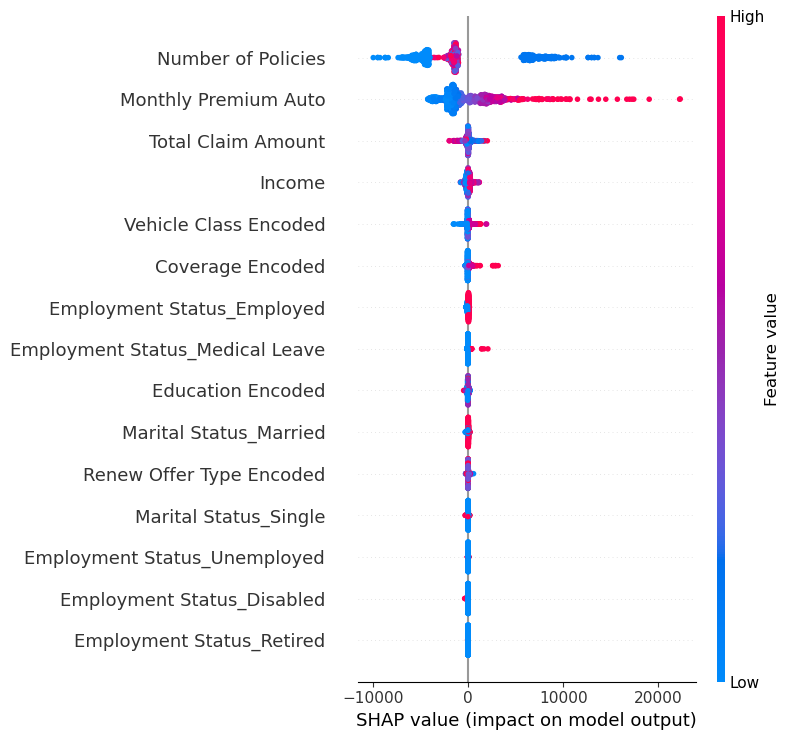

In [46]:
import shap
import numpy as np

# Apply preprocessing to the training data
X_test_preprocessed = gscv.best_estimator_.named_steps['preprocessor'].transform(X_test)

# Apply feature selection to the preprocessed data
X_test_selected = gscv.best_estimator_.named_steps['feature_selection'].transform(X_test_preprocessed)

# Get the feature names after selection
feature_names = gscv.best_estimator_.named_steps['feature_selection'].get_support(indices=True)
selected_feature_names = np.array(feat_cols)[feature_names]

# Get feature importance from the best model
best_model = gscv.best_estimator_.named_steps['regressor']

# Generate SHAP values
explainer = shap.Explainer(best_model, X_test_selected)
shap_values = explainer(X_test_selected, check_additivity=False)

# Plot SHAP summary plot
shap.summary_plot(shap_values, X_test_selected, feature_names=selected_feature_names)

**PENJELASAN**

Diagram SHAP ini digunakan untuk menjelaskan kontribusi masing-masing fitur terhadap prediksi model machine learning yang digunakan untuk memprediksi Customer Lifetime Value (CLV). Dapat diketahui bahwa:

**1. Fitur dengan Dampak Positif dan Negatif Terbesar**

- `Number of Policies`: Fitur ini memiliki dampak signifikan pada prediksi CLV. Jumlah kebijakan yang lebih tinggi (merah) cenderung meningkatkan prediksi CLV, sedangkan jumlah kebijakan yang lebih rendah (biru) cenderung menurunkan prediksi CLV.
- `Monthly Premium Auto`: Premi bulanan yang lebih tinggi memiliki dampak positif pada prediksi CLV, menunjukkan bahwa pelanggan dengan premi bulanan yang lebih tinggi cenderung memiliki CLV yang lebih tinggi.
- `Total Claim Amount`: Jumlah total klaim yang diajukan pelanggan juga berdampak signifikan, dengan klaim yang lebih tinggi (merah) cenderung meningkatkan CLV.

**2. Fitur dengan Dampak Beragam:**

- `Income`: Pendapatan yang lebih tinggi cenderung meningkatkan prediksi CLV, menunjukkan bahwa pelanggan dengan pendapatan yang lebih tinggi biasanya memiliki nilai seumur hidup yang lebih tinggi.
- `Employment Status`: Status pekerjaan seperti "Employed" (bekerja) memiliki dampak positif pada CLV dibandingkan dengan "Unemployed" (tidak bekerja) atau "Disabled" (cacat).

# 4. CONCLUSION AND RECOMMENDATION

#### MODEL LIMITATION

> #### - Model hanya dapat memprediksi nilai CLV pelanggan berdasarkan fitur dan value sebagai berikut:

| Feature Limitation         | Feature Value Limitation                                                                                                                                                         |
|:---------------------|:-------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Vehicle Class        | Four-Door Car, Two-Door Car, SUV, Sports Car, Luxury SUV, Luxury Car                                                                                             |
| Coverage             | Extended, Basic, Premium                                                                                                                                           |
| Renew Offer Type     | Offer 1, Offer 2, Offer 3, Offer 4                                                                                                                                 |
| Employment Status    | Retired, Employed, Disabled, Medical Leave, Unemployed                                                                                                            |
| Marital Status       | Divorced, Married, Single                                                                                                                                         |
| Education            | High School or Below, College, Master, Bachelor, Doctor                                                                                                            |
| Number of Policies  | Rentang dari 1 hingga 9                                                                                                                                           |
| Monthly Premium Auto| Rentang dari 61 hingga 297                                                                                                                                        |
| Total Claim Amount  | Rentang dari 0.423310 hingga 2759.794354                                                                                                                          |
| Income               | Rentang dari 0 hingga 99934                                                                                                                                       |

#### CONCLUSION

- Berdasarkan hasil analisa, didapat sebuah model machine learning yang dapat memprediksi nilai CLV customer dengan rentang error sebesar $1814.3 dengan fitur yang paling berpengaruh yaitu Number of Policies dan Monthly Premium Auto.

- Berdasarkan hasil segmentasi pelanggan menggunakan nilai prediksi CLV, didapat sebanyak `722` customer sebagai pelanggan dengan nilai CLV tinggi dan sebanyak `412` sebagai pelanggan dengan nilai CLV rendah.

#### BUSINESS RECOMMENDATION

Untuk melakukan penghematan biaya kampanye, perusahaan dapat memberikan kampanye hanya pada customer dengan nilai CLV rendah untuk mempertahankan retensi pelanggan. Beberapa contoh kampanye yang dapat dilakukan yaitu:

- Edukasi tentang Manfaat Asuransi: Kampanye edukasi untuk memberi pelanggan pemahaman yang lebih baik tentang manfaat asuransi mereka. Banyak pelanggan mungkin tidak menyadari nilai perlindungan yang mereka dapatkan dari polis mereka.

- Program Diskon dan Insentif: Menawarkan diskon atau insentif khusus untuk pelanggan yang tetap setia. Misalnya, diskon untuk pelanggan yang telah mempertahankan polis selama beberapa tahun.

- Peningkatan Layanan Pelanggan: Fokus pada pelayanan pelanggan yang unggul dapat membuat pelanggan merasa dihargai dan diperhatikan.

#### BUSINESS IMPACT

Hal ini akan memberikan dampak bisnis yang cukup signifikan dalam penghematan biaya kampanye, diantaranya:

1. Berpeluang menghemat biaya kampanye hingga 36.34% dibandingkan dengan kampanye pada seluruh pelanggan.

|                          | Tanpa Model ML | Dengan Model ML | Model ML + Biaya Lebih |
|--------------------------|----------------|-----------------|------------------------|
| **Pelanggan Dituju**     | 1134           | 722            | 722                   |
| **Asumsi Biaya/Pelanggan**      | 100            | 100             | 125                |
| **Total Biaya**          | \$ 113,400      | \$ 72,200      | \$ 90,250            |
| **Penghematan Biaya**    | -              | \$ 41,200         | \$ 23.150                 |

2. Berpeluang menghemat sebesar 400% (5 kali lipat) biaya kampanye dengan fokus mempertahankan retensi pelanggan.

Diasumsikan bahwa customer dengan CLV rendah merupakan customer yang berpotensi berhenti menggunakan layanan perusahaan. Maka terdapat potensi kehilangan sebanyak 722 pelanggan. Berdasarkan 

|                          | Tanpa Model ML | Dengan Model ML |
|--------------------------|----------------|-----------------|
| **Pelanggan Dituju**     | 722            | 722             |
| **Asumsi Biaya/Pelanggan**| \$500          | \$100           |
| **Total Biaya**          | \$361,000      | \$72,200        |
| **Penghematan Biaya**    | -              | \$288,800       |

Sumber: https://www.optimove.com/resources/learning-center/customer-acquisition-vs-retention-costs

#### MODEL IMPROVEMENT RECOMMENDATION

- **Menambahkan Fitur Baru**: Cari dan tambahkan fitur baru yang mungkin berpengaruh pada CLV, seperti data demografis regional atau statistik kecelakaan lalu lintas, untuk memperkaya fitur yang digunakan dalam model.

- **Model Ensembles**: Gabungkan prediksi dari beberapa model (bagging, boosting, stacking) untuk meningkatkan akurasi dan mengurangi variance.

#### SEKIAN DAN TERIMA KASIH

**REFERENCE**

- https://focus-digital.co/average-customer-acquisition-cost-in-the-insurance-industry/
- https://www.gartner.com/en/digital-markets/insights/what-is-customer-lifetime-value
- https://business.localfluence.com/organic-vs-nonorganic-traffic-whats-the-difference/
- https://www.optimove.com/resources/learning-center/customer-acquisition-vs-retention-costs